# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

This project aims to study two plans ('Surf' and 'Ultimate') provided by the Megaline telecom company and determine which one brings in more revenue. This will be done by looking at calling, texting, and internet use from users of both plans to determine notable patterns of use and revenue generation. This will be done using the following steps:

1) Fixing and errors in the data set and enriching the data with any further information
2) Studying plan conditions to understand the revenue generated by each plan
3) Looking at data on the individual user level to understand how they use minutes, messages, and gb on a month to month basis. This also includes comparing use behaviors across plans. This will be done using statistical methods such as looking at means, variance, standard deviation, and graphing the data.
4) Hypothesis testing on revenue calculations to see if the differences in revenue across plans can be deemed statistically signifigant.


## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
display(plans)
print(plans.info())

#check for duplicated rows
print(f"Number of duplicated rows:", plans.duplicated().sum())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
Number of duplicated rows: 0


In [4]:
# Print a sample of data for plans
print(plans.sample())

   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

This data frame has two rows with no missing values. All of the data types make sense for future data manipulation. At this time, I do not see anything that warrants further investigation in this data frame.

## Fix data and Enrich Data

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
display(users)
print(users.info())

#check for duplicated rows
print(f"Number of duplicated rows:", users.duplicated().sum())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Number of duplicated rows: 0


In [6]:
# Print a sample of data for users
display(users.sample(10))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
88,1088,Paris,Robertson,64,"Phoenix-Mesa-Chandler, AZ MSA",2018-05-27,ultimate,NaN
96,1096,Song,Cline,28,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-22,ultimate,NaN
354,1354,Leonel,Dyer,41,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-24,ultimate,NaN
19,1019,Shizue,Landry,34,"Jacksonville, FL MSA",2018-01-16,surf,NaN
345,1345,Pasquale,Caldwell,26,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-12,surf,NaN
272,1272,Ernest,Mercado,23,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-04,surf,NaN
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
458,1458,Joella,Munoz,32,"Detroit-Warren-Dearborn, MI MSA",2018-07-24,ultimate,NaN
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,NaN
294,1294,Demetrius,Russo,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

In the given data set, certain issues need to be fixed to make usage of this data possible. Firstly, everytthing should be formatted the same. This means converting all object types to contain only lower case letters. Secondly, the reg_date should be converted to the datetime() format. Lastly, the churn_date should have the null values changed to be more descriptive. I chose not to convert this to datetime as well seeing as only 34/500 have applicable churn dates. using a written description will be more telling for the overall data set. 

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [7]:
#all data should be lower case to avoid issues
def convert_to_lower(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].str.contains('[A-Z]').any():
                df[column] = df[column].str.lower()
    return df
users = convert_to_lower(users)
display(users.head(10))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaN
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaN
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaN
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,NaN
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,NaN
5,1005,livia,shields,31,"dallas-fort worth-arlington, tx msa",2018-11-29,surf,NaN
6,1006,jesusa,bradford,73,"san francisco-oakland-berkeley, ca msa",2018-11-27,ultimate,2018-12-18
7,1007,eusebio,welch,42,"grand rapids-kentwood, mi msa",2018-07-11,surf,NaN
8,1008,emely,hoffman,53,"orlando-kissimmee-sanford, fl msa",2018-08-03,ultimate,NaN
9,1009,gerry,little,19,"san jose-sunnyvale-santa clara, ca msa",2018-04-22,surf,NaN


In [8]:
#reg date needs to be converted to datetime()
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [9]:
#reformat the date to match data description COME BACK TO THIS

In [10]:
#replace churn date 'NaN' with 'in use' to avoid confusion
users['churn_date'] = users['churn_date'].fillna('in use')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


[Add additional factors to the data if you believe they might be useful.]

## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame
display(calls.info())
#check for duplicated rows
print(f"Number of duplicated rows:", calls.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

Number of duplicated rows: 0


In [12]:
# Print a sample of data for calls
display(calls.sample(10))

,id,user_id,call_date,duration
26251,1099_578,1099,2018-08-15,2.99
80563,1291_163,1291,2018-06-20,10.70
3751,1014_622,1014,2018-12-24,11.74
101568,1362_318,1362,2018-07-30,0.00
46667,1170_158,1170,2018-11-15,1.29
17893,1068_219,1068,2018-12-04,0.67
23076,1084_123,1084,2018-12-29,0.00
74934,1264_242,1264,2018-05-18,0.00
101928,1362_688,1362,2018-06-21,7.10
41436,1153_69,1153,2018-10-21,0.00


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

In order to use this data set properly, the duration of the call should be rounded up to the nearest minute. Since each individual call is rounded, it makes sense to do it at this step. the call_date can also be converted to date time to remain consistent with other datasets, however since the data description does not specify a format, it will not be changed.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [13]:
#convert call_date to datetime()
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [14]:
#round each call up to the nearest minute and convert to integer type.
calls['duration'] = np.ceil(calls['duration']).astype(int)
display(calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [15]:
#add a month column using the date column
calls['month'] = calls['call_date'].dt.month
display(calls)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame
display(messages)
print(messages.info())
#check for duplicated rows
print(f"Number of duplicated rows:", calls.duplicated().sum())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
Number of duplicated rows: 0


In [17]:
# Print a sample of data for messages
display(messages.sample(10))


,id,user_id,message_date
43842,1293_153,1293,2018-10-30
16766,1111_271,1111,2018-12-18
38214,1251_266,1251,2018-05-21
12126,1080_129,1080,2018-08-28
60435,1381_548,1381,2018-09-30
11268,1077_539,1077,2018-04-22
21996,1132_1557,1132,2018-09-08
39648,1257_201,1257,2018-12-20
63379,1404_50,1404,2018-09-04
53055,1339_189,1339,2018-05-21


Upon looking at the data, small changes need to be made to make the data more useable. The id should be changed to an integer type. the message date should be changed to date time. As their are no duplicated rows or known 'NaN' in the data frame, no manipulation needs to be done to compensate for those. 

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [18]:
#convert 'id' to an integer type
messages['id'] = messages['id'].astype(int)
display(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  int64 
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


None

In [19]:
#convert message date to datetime()
messages['message_date']= pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  int64         
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB
None


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [20]:
#add a column to the messages df containing just the month data
messages['month'] = messages['message_date'].dt.month
display(messages)

,id,user_id,message_date,month
0,1000125,1000,2018-12-27,12
1,1000160,1000,2018-12-31,12
2,1000223,1000,2018-12-31,12
3,1000251,1000,2018-12-27,12
4,1000255,1000,2018-12-26,12
...,...,...,...,...
76046,1497526,1497,2018-12-24,12
76047,1497536,1497,2018-12-24,12
76048,1497547,1497,2018-12-31,12
76049,1497558,1497,2018-12-24,12


## Internet

In [21]:
# Print the general/summary information about the internet DataFrame
display(internet.info())
display(internet.head(10))
#check for duplicated rows
print(f"Number of duplicated rows:", calls.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Number of duplicated rows: 0


In [22]:
# Print a sample of data for the internet traffic
display(internet.sample(10))

,id,user_id,session_date,mb_used
65225,1300_118,1300,2018-11-09,465.14
29161,1133_202,1133,2018-10-12,0.00
25908,1121_1,1121,2018-12-07,439.00
18896,1084_158,1084,2018-11-22,0.00
12331,1060_40,1060,2018-12-19,81.48
48869,1218_20,1218,2018-12-11,317.10
6729,1039_4,1039,2018-11-10,609.89
66837,1312_60,1312,2018-08-26,200.01
64083,1294_4,1294,2018-09-30,183.14
32178,1145_314,1145,2018-10-30,0.00


Upon looking at the data, small changes need to be made to make the data more useable. The id should be changed to an integer type. the session date should be changed to date time. As their are no duplicated rows or known 'NaN' in the data frame, no manipulation needs to be done to compensate for those.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [23]:
#convert 'id' to an integer type
internet['id'] = internet['id'].astype(int)
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  int64  
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ MB


None

In [24]:
#convert session date to datetime()
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
print(internet.info())
display(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  int64         
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 MB
None


,id,user_id,session_date,mb_used
0,100013,1000,2018-12-29,89.86
1,1000204,1000,2018-12-31,0.00
2,1000379,1000,2018-12-28,660.40
3,1000413,1000,2018-12-26,270.99
4,1000442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499215,1499,2018-10-20,218.06
104821,1499216,1499,2018-12-30,304.72
104822,1499217,1499,2018-09-22,292.75
104823,1499218,1499,2018-12-07,0.00


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [25]:
#create an additional df that has the sum of monthly mb for each user
internet['month'] = internet['session_date'].dt.month
display(internet)

,id,user_id,session_date,mb_used,month
0,100013,1000,2018-12-29,89.86,12
1,1000204,1000,2018-12-31,0.00,12
2,1000379,1000,2018-12-28,660.40,12
3,1000413,1000,2018-12-26,270.99,12
4,1000442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499215,1499,2018-10-20,218.06,10
104821,1499216,1499,2018-12-30,304.72,12
104822,1499217,1499,2018-09-22,292.75,9
104823,1499218,1499,2018-12-07,0.00,12


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [26]:
# Print out the plan conditions and make sure they are clear for you
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [27]:
# Calculate the number of calls made by each user per month. Save the result.
call_counts = calls.groupby(['user_id', 'month'])['id'].count().reset_index(name='call_count')
display(call_counts)

,user_id,month,call_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [28]:
# Calculate the amount of minutes spent by each user per month. Save the result.
call_minutes = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minute_count')
display(call_minutes)


,user_id,month,minute_count
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [29]:
# Calculate the number of messages sent by each user per month. Save the result.
display(messages)
message_counts = messages.groupby(['user_id', 'month'])['id'].count().reset_index(name='message_count')
display(message_counts)

,id,user_id,message_date,month
0,1000125,1000,2018-12-27,12
1,1000160,1000,2018-12-31,12
2,1000223,1000,2018-12-31,12
3,1000251,1000,2018-12-27,12
4,1000255,1000,2018-12-26,12
...,...,...,...,...
76046,1497526,1497,2018-12-24,12
76047,1497536,1497,2018-12-24,12
76048,1497547,1497,2018-12-31,12
76049,1497558,1497,2018-12-24,12


,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [30]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
#group by user and the month they used the mb
internet_user_monthly= internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
#convert to gb and round up
internet_user_monthly['mb_used'] = internet_user_monthly['mb_used'] / 1024
internet_user_monthly['mb_used'] = np.ceil(internet_user_monthly['mb_used']).astype(int)
#change column name to reflect gb
internet_user_monthly = internet_user_monthly.rename(columns={'mb_used': 'gb_used_monthly'})
display(internet_user_monthly)

,user_id,month,gb_used_monthly
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [31]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_df = call_counts.merge(call_minutes, on=['user_id', 'month'])
merged_df = merged_df.merge(message_counts, on=['user_id', 'month'])
merged_df = merged_df.merge(internet_user_monthly, on=['user_id', 'month'])
display(merged_df)

,user_id,month,call_count,minute_count,message_count,gb_used_monthly
0,1000,12,16,124,11,2
1,1001,8,27,182,30,7
2,1001,9,49,315,44,14
3,1001,10,65,393,53,22
4,1001,11,64,426,36,19
...,...,...,...,...,...,...
1754,1496,9,52,414,21,17
1755,1496,10,46,317,18,14
1756,1496,11,39,308,13,9
1757,1496,12,40,294,11,17


In [32]:
# Add the plan information
#create new df with just user_id and plan
user_plan = users[['user_id', 'plan']]
#merge new df with old df
merged_df = merged_df.merge(user_plan, on='user_id')
display(merged_df)

,user_id,month,call_count,minute_count,message_count,gb_used_monthly,plan
0,1000,12,16,124,11,2,ultimate
1,1001,8,27,182,30,7,surf
2,1001,9,49,315,44,14,surf
3,1001,10,65,393,53,22,surf
4,1001,11,64,426,36,19,surf
...,...,...,...,...,...,...,...
1754,1496,9,52,414,21,17,surf
1755,1496,10,46,317,18,14,surf
1756,1496,11,39,308,13,9,surf
1757,1496,12,40,294,11,17,surf


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [33]:
# Create a new 'revenue' column with multiple conditions
merged_df['revenue'] = np.where(
    #condition for 'ultimate' plan
    (merged_df['plan'] == 'ultimate') & (merged_df['gb_used_monthly'] <= 30) & 
    (merged_df['message_count'] <= 1000) & (merged_df['minute_count'] <= 3000), 70.00,
    np.where(
        #condition for 'surf' plan
        (merged_df['plan'] == 'surf') & (merged_df['gb_used_monthly'] <= 15) & 
        (merged_df['message_count'] <= 50) & (merged_df['minute_count'] <= 500), 20.00,
        np.where(
            #revenue calculation for 'ultimate' plan if conditions are NOT met
            (merged_df['plan'] == 'ultimate'),
            (
                ((merged_df['minute_count'] - 3000) * 0.01) + 
                ((merged_df['message_count'] - 1000) * 0.01) + 
                ((merged_df['gb_used_monthly'] - 30) * 7) + 70.00
            ),
            np.where(
                #revenue calculation for 'surf' plan if conditions are NOT met
                (merged_df['plan'] == 'surf'),
                (
                    ((merged_df['minute_count'] - 500) * 0.03) + 
                    ((merged_df['message_count'] - 50) * 0.03) + 
                    ((merged_df['gb_used_monthly'] - 15) * 10) + 20.00
                ),
                np.nan 
            )
        )
    )
)
display(merged_df.info())
display(merged_df.sample(10))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 1758
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          1759 non-null   int64  
 1   month            1759 non-null   int64  
 2   call_count       1759 non-null   int64  
 3   minute_count     1759 non-null   int64  
 4   message_count    1759 non-null   int64  
 5   gb_used_monthly  1759 non-null   int64  
 6   plan             1759 non-null   object 
 7   revenue          1759 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 123.7+ KB


None

,user_id,month,call_count,minute_count,message_count,gb_used_monthly,plan,revenue
1552,1434,9,74,451,50,15,surf,20.00
401,1115,11,44,342,33,6,surf,20.00
1090,1299,12,58,435,10,12,surf,20.00
842,1236,5,58,369,35,15,ultimate,70.00
1445,1399,6,31,253,10,16,surf,21.39
1265,1347,11,62,425,71,23,ultimate,70.00
1380,1380,11,61,421,67,18,ultimate,70.00
1683,1472,4,68,477,27,10,surf,20.00
709,1196,6,89,648,34,25,ultimate,70.00
350,1100,11,52,366,47,25,surf,115.89


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

plan,surf,ultimate
month,,
1,292,198
2,332,487
3,345,416
4,367,323
5,444,411
6,426,371
7,453,440
8,428,437
9,427,438


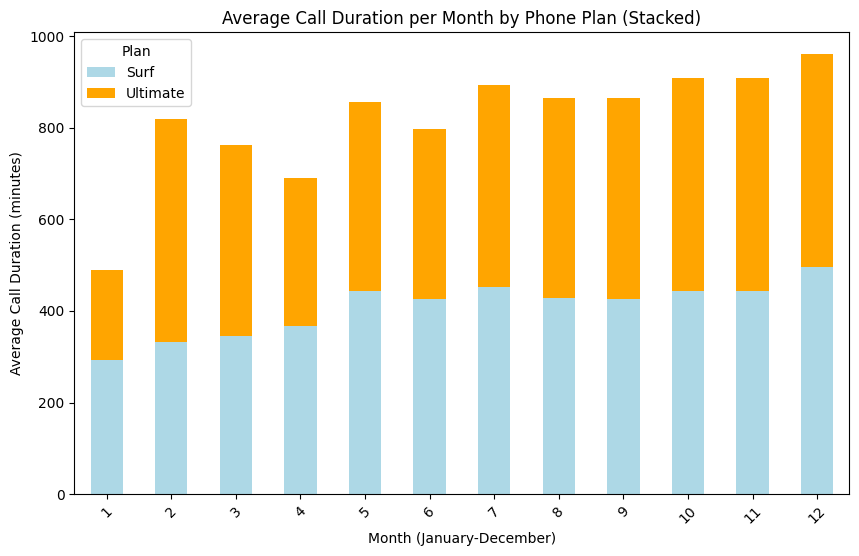

In [34]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
# create df grouping the nummber of minutes used per month by each plan type and find the average.
avg_duration = merged_df.groupby(['month', 'plan'])['minute_count'].mean().unstack(fill_value=0)
avg_duration = np.ceil(avg_duration).astype(int)
display(avg_duration)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bars for each plan, using different colors
avg_duration.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'orange'])  # Blue for 'surf', Orange for 'ultimate'

# Add labels and title
ax.set_title('Average Call Duration per Month by Phone Plan (Stacked)')
ax.set_xlabel('Month (January-December)')
ax.set_ylabel('Average Call Duration (minutes)')
ax.legend(title='Plan', labels=['Surf', 'Ultimate'])

# Display the plot
plt.xticks(rotation=45)  
plt.show()

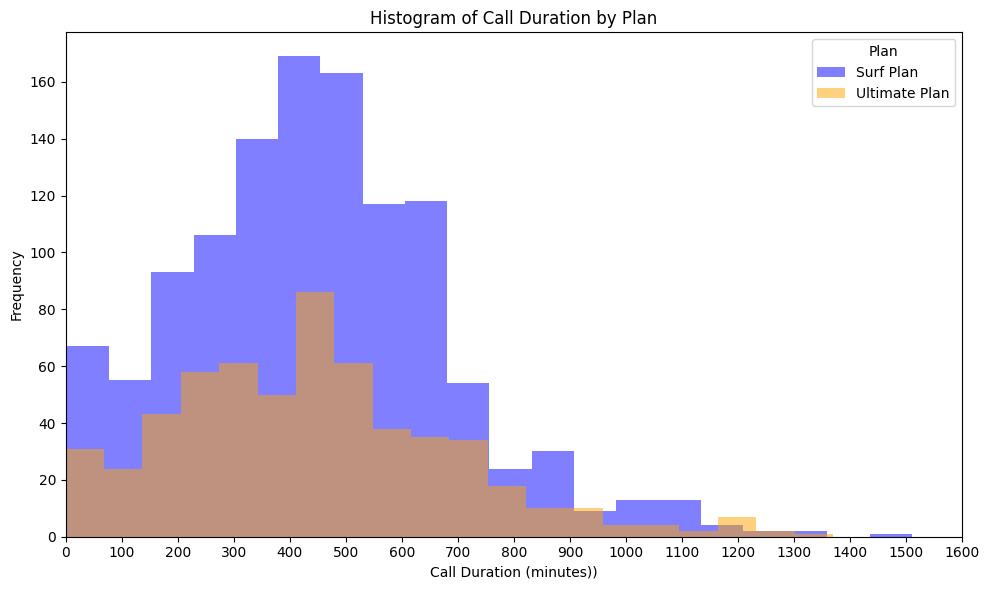

In [35]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# Separate data into 'surf' and 'ultimate' plans
surf_min_count = merged_df[merged_df['plan'] == 'surf']['minute_count']
ultimate_min_count = merged_df[merged_df['plan'] == 'ultimate']['minute_count']

#plot histogram 
plt.figure(figsize=(10, 6))

#plot histograms for 'surf' and 'ultimate' with different colors
plt.hist(surf_min_count, bins=20, alpha=0.5, label='Surf Plan', color='blue')
plt.hist(ultimate_min_count, bins=20, alpha=0.5, label='Ultimate Plan', color='orange')

#add labels and title
plt.title('Histogram of Call Duration by Plan')
plt.xlabel('Call Duration (minutes))')
plt.ylabel('Frequency')
plt.xlim([0,1500])
plt.xticks(range(0, int(merged_df['minute_count'].max()) + 100, 100))

#add legend
plt.legend(title='Plan')

#display the plot
plt.tight_layout()
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [36]:
# Calculate the mean and the variance of the monthly call duration (min count)
avg_duration_variance = merged_df.groupby(['month', 'plan'])['minute_count'].var().reset_index()
avg_duration_std = merged_df.groupby(['month', 'plan'])['minute_count'].std().reset_index()
display(f"The average monthly call duration for both plans plan are :", avg_duration)
display(f"The monthly call duration variances for the different plans are :", avg_duration_variance)
display(f"The monthly call duration standard deviations for the different plans are:", avg_duration_std)


'The average monthly call duration for both plans plan are :'

plan,surf,ultimate
month,,
1,292,198
2,332,487
3,345,416
4,367,323
5,444,411
6,426,371
7,453,440
8,428,437
9,427,438


'The monthly call duration variances for the different plans are :'

,month,plan,minute_count
0,1,surf,NaN
1,1,ultimate,24754.333333
2,2,surf,101102.200000
3,2,ultimate,65897.700000
4,3,surf,43077.929167
5,3,ultimate,61341.904762
6,4,surf,62626.652101
7,4,ultimate,40850.733333
8,5,surf,62096.326560
9,5,ultimate,54970.361905


'The monthly call duration standard deviations for the different plans are:'

,month,plan,minute_count
0,1,surf,NaN
1,1,ultimate,157.335099
2,2,surf,317.965721
3,2,ultimate,256.705473
4,3,surf,207.552232
5,3,ultimate,247.672979
6,4,surf,250.253176
7,4,ultimate,202.115643
8,5,surf,249.191345
9,5,ultimate,234.457591


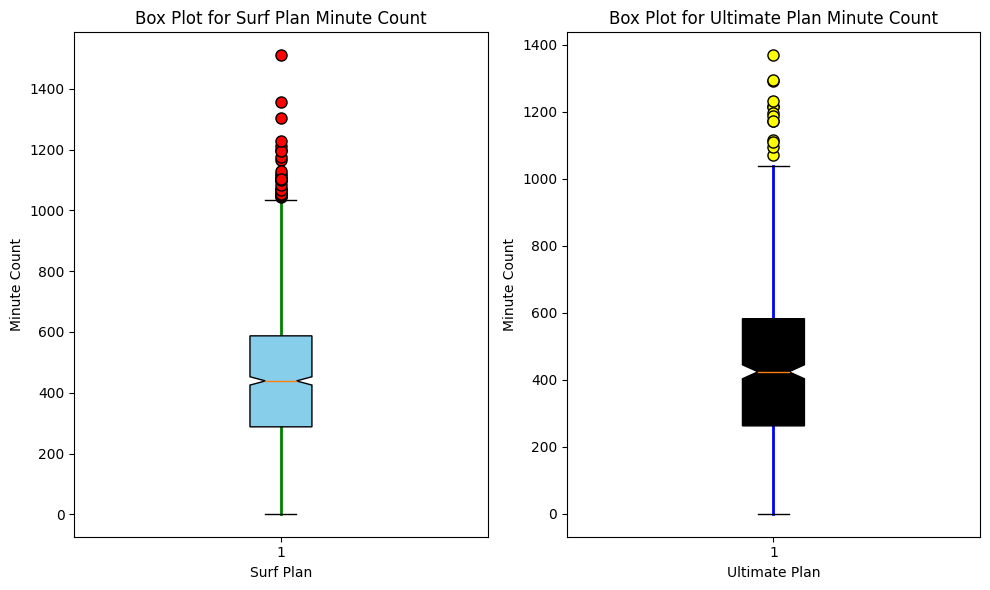

In [37]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(10, 6))

#box plot for 'surf_min_count'
plt.subplot(1, 2, 1) 
plt.boxplot(surf_min_count, patch_artist=True, notch=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='green', linewidth=2), 
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('Box Plot for Surf Plan Minute Count')
plt.xlabel('Surf Plan')
plt.ylabel('Minute Count')

# Box plot for 'ultimate_min_count'
plt.subplot(1, 2, 2)  
plt.boxplot(ultimate_min_count, patch_artist=True, notch=True,
            boxprops=dict(facecolor='black', color='black'),
            whiskerprops=dict(color='blue', linewidth=2),
            flierprops=dict(markerfacecolor='yellow', marker='o', markersize=8))
plt.title('Box Plot for Ultimate Plan Minute Count')
plt.xlabel('Ultimate Plan')
plt.ylabel('Minute Count')


plt.tight_layout()
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

Users showed relatively similar call durations across plans. the median, mean, and IQR of the ultimate plan is slightly higher. Further statistical testing is needed to gauge if this difference is signifigant.

### Messages

plan,surf,ultimate
month,,
1,21,21
2,22,28
3,22,35
4,25,29
5,34,45
6,33,38
7,35,42
8,38,48
9,39,46


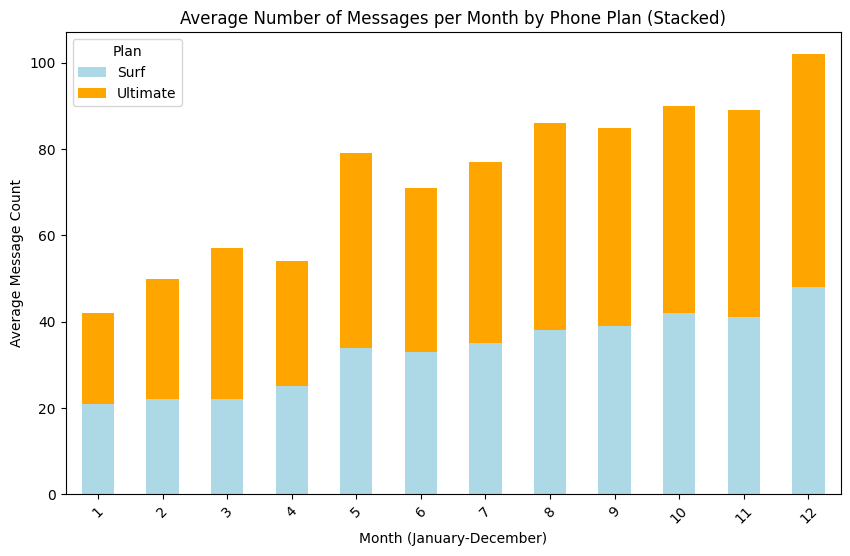

In [38]:
# Compare the number of messages users of each plan tend to send each month

#create df grouping the nummber of minutes used per month by each plan type and find the average.
avg_message = merged_df.groupby(['month', 'plan'])['message_count'].mean().unstack(fill_value=0)
avg_message = np.ceil(avg_message).astype(int)
display(avg_message)

#plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

#plot the stacked bars for each plan, using different colors
avg_message.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'orange'])  # Blue for 'surf', Orange for 'ultimate'

#add labels and title
ax.set_title('Average Number of Messages per Month by Phone Plan (Stacked)')
ax.set_xlabel('Month (January-December)')
ax.set_ylabel('Average Message Count')
ax.legend(title='Plan', labels=['Surf', 'Ultimate'])

#display the plot
plt.xticks(rotation=45)  
plt.show()


Overall, users of the 'ultimate' plan tend to send more messages than those using the 'surf' plan. As their plan has a much higher amount of messages covered in their montly charge, it makes sense that those who either tend to send more messages have the plan, or people feel free to text more because they have the freedom to do so. 

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

In [39]:
# Compare the amount of internet traffic consumed by users per plan

plan,surf,ultimate
month,,
1,8,8
2,10,18
3,13,24
4,13,15
5,16,18
6,16,16
7,17,17
8,18,18
9,17,17


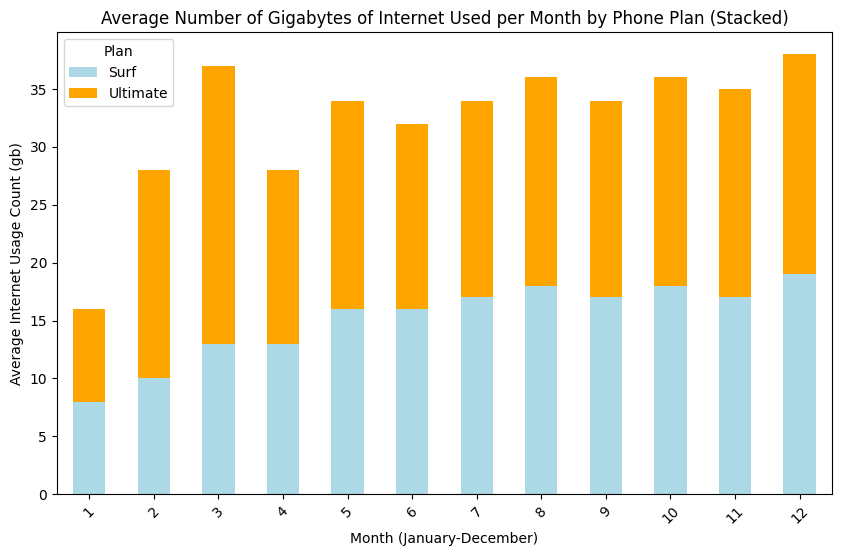

In [40]:
#create df grouping the nummber of gb used per month by each plan type and find the average.
avg_gb = merged_df.groupby(['month', 'plan'])['gb_used_monthly'].mean().unstack(fill_value=0)
avg_gb = np.ceil(avg_gb).astype(int)
display(avg_gb)

#plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

#plot the stacked bars for each plan, using different colors
avg_gb.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'orange'])  # Blue for 'surf', Orange for 'ultimate'

#add labels and title
ax.set_title('Average Number of Gigabytes of Internet Used per Month by Phone Plan (Stacked)')
ax.set_xlabel('Month (January-December)')
ax.set_ylabel('Average Internet Usage Count (gb)')
ax.legend(title='Plan', labels=['Surf', 'Ultimate'])

#display the plot
plt.xticks(rotation=45)  
plt.show()

Interestingly enough, while 'ultimate' plan users had more internet usage in the first half of the year, in the second half of the year both plan types were using the internet almost equally. From June to December, the average is the same for both plans (except November where 'surf' users used on average one less gb). It would be interesting to see if further usage across months increases with holidays, popular vacation times, school breaks, etc.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

plan,surf,ultimate
month,,
1,20,70
2,15,70
3,37,63
4,38,71
5,46,70
6,46,71
7,54,71
8,59,71
9,50,70


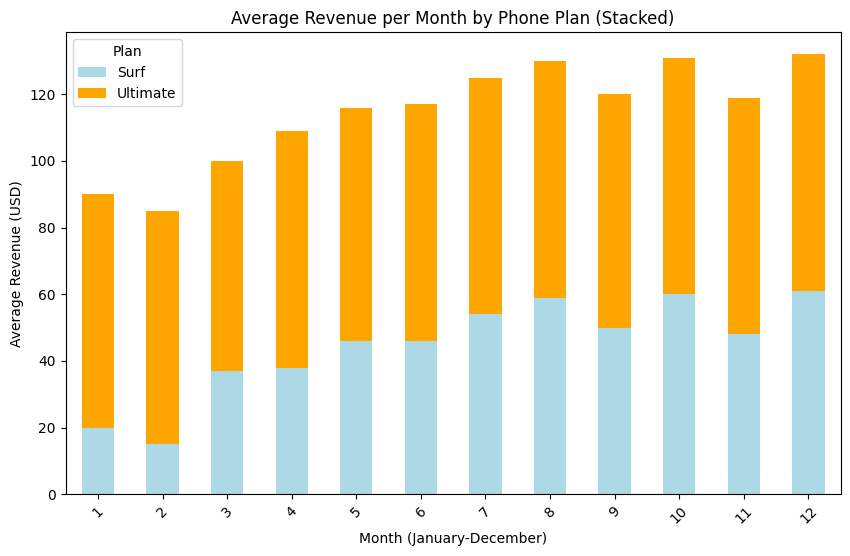

In [41]:
# Compare the average amount of revenue generated by users per plan
avg_revenue = merged_df.groupby(['month', 'plan'])['revenue'].mean().unstack(fill_value=0)
avg_revenue = np.ceil(avg_revenue).astype(int)
display(avg_revenue)

#plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

#plot the stacked bars for each plan, using different colors
avg_revenue.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'orange'])  # Blue for 'surf', Orange for 'ultimate'

#add labels and title
ax.set_title('Average Revenue per Month by Phone Plan (Stacked)')
ax.set_xlabel('Month (January-December)')
ax.set_ylabel('Average Revenue (USD)')
ax.legend(title='Plan', labels=['Surf', 'Ultimate'])

#display the plot
plt.xticks(rotation=45)  
plt.show()

In [42]:
# Calculate the mean, variance, and standard deviation of the monthly revenue
revenue_variance = merged_df.groupby(['month', 'plan'])['revenue'].var().reset_index()
revenue_std = merged_df.groupby(['month', 'plan'])['revenue'].std().reset_index()
display(f"The average monthly revenues for both plans plan are :", avg_revenue)
display(f"The monthly revenue variances for the different plans are :", revenue_variance)
display(f"The monthly revenue standard deviations for the different plans are:", revenue_std)

'The average monthly revenues for both plans plan are :'

plan,surf,ultimate
month,,
1,20,70
2,15,70
3,37,63
4,38,71
5,46,70
6,46,71
7,54,71
8,59,71
9,50,70


'The monthly revenue variances for the different plans are :'

,month,plan,revenue
0,1,surf,NaN
1,1,ultimate,0.000000
2,2,surf,195.787820
3,2,ultimate,0.000000
4,3,surf,498.421545
5,3,ultimate,177.004890
6,4,surf,1306.994607
7,4,ultimate,6.630625
8,5,surf,2817.614783
9,5,ultimate,14.566671


'The monthly revenue standard deviations for the different plans are:'

,month,plan,revenue
0,1,surf,NaN
1,1,ultimate,0.000000
2,2,surf,13.992420
3,2,ultimate,0.000000
4,3,surf,22.325357
5,3,ultimate,13.304318
6,4,surf,36.152380
7,4,ultimate,2.575000
8,5,surf,53.081209
9,5,ultimate,3.816631


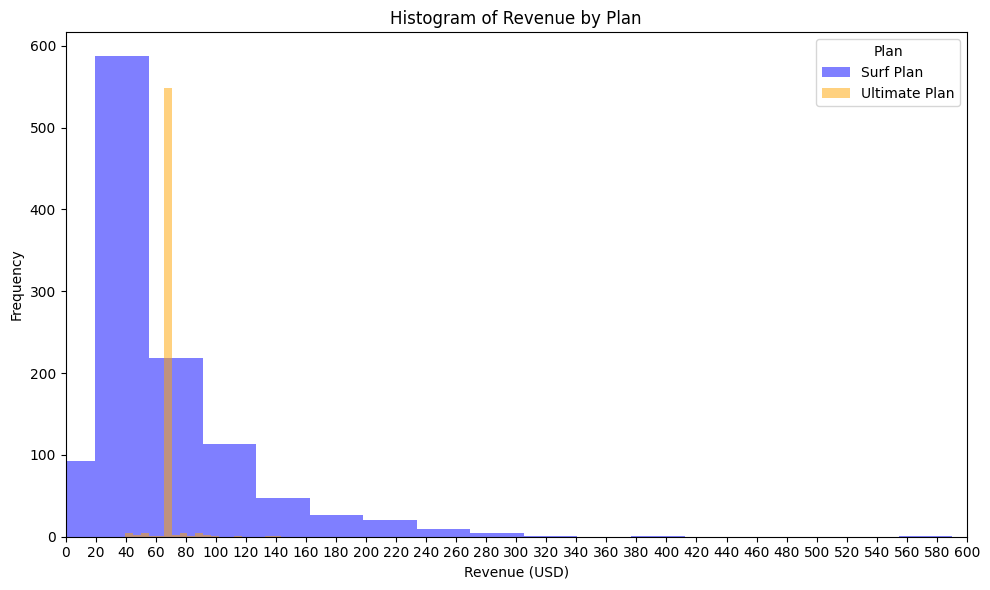

In [43]:
#create a histogram with the given data
#separate data into 'surf' and 'ultimate' plans
surf_revenue = merged_df[merged_df['plan'] == 'surf']['revenue']
ultimate_revenue = merged_df[merged_df['plan'] == 'ultimate']['revenue']

#plot histogram 
plt.figure(figsize=(10, 6))

#plot histograms for 'surf' and 'ultimate' with different colors
plt.hist(surf_revenue, bins=20, alpha=0.5, label='Surf Plan', color='blue')
plt.hist(ultimate_revenue, bins=20, alpha=0.5, label='Ultimate Plan', color='orange')

#add labels and title
plt.title('Histogram of Revenue by Plan')
plt.xlabel('Revenue (USD)')
plt.ylabel('Frequency')
plt.xlim([0,500])
plt.xticks(range(0, int(merged_df['revenue'].max()) + 20, 20))

#add legend
plt.legend(title='Plan')

#display the plot
plt.tight_layout()
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

The histogram above describes the relationship between revenue and the different plans, Surf plan users data is a right skewed hisogram. This is showing that a majority of surf users bring in between $20-$50 USD in revenue. Ultimate plan users showed little variance in their revenue, with most bringing in $70 USD, which is the plan monthly charge. 

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

This question is asking how the average revenue from users of the surf and ultimate plans differ. I will be using a one tailed hypothesis to test if the 'Ultimate' revenue is higher on average than the 'Surf' revenue

H0 = μ ultimate = μ surf
H1 = μ ultimate > μ surf

In [44]:
# Test the hypotheses
display(surf_revenue)
display(ultimate_revenue)
results = st.ttest_ind(ultimate_revenue, surf_revenue, alternative='greater')
p_value = results.pvalue
print('p-value:', results.pvalue)
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the means (ultimate revenue > surf revenue).")
else:
    print("Fail to reject the null hypothesis: No significant difference in the means (ultimate revenue > surf revenue).")

1       20.00
2       20.00
3       86.88
4       57.36
5       57.18
        ...  
1753    20.00
1754    36.55
1755    20.00
1756    20.00
1757    32.65
Name: revenue, Length: 1180, dtype: float64

0       70.00
19      70.00
20      45.98
26      70.00
27      70.00
        ...  
1714    70.00
1718    70.00
1719    70.00
1730    70.00
1758    70.00
Name: revenue, Length: 579, dtype: float64

p-value: 4.927068861014354e-12
Reject the null hypothesis: There is a significant difference in the means (ultimate revenue > surf revenue).


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In order to see if there is a difference in revenue based on being in the my-nj location, a two-tailed ttest must be completed. The hypothesis will be:

H0 = μ ny-nj = μ other regions
H1 = μ ny-nj ≠ μ other regions

In [45]:
# Test the hypotheses
users_ny_nj = users[users['city'].str.contains('ny-nj', case=False, na=False)]
users_other = users[~users['city'].str.contains('ny-nj', case=False, na=False)]  
#create new df with just user_id and revenue
user_revenue = merged_df[['user_id', 'revenue']]
#merge separate dfs with revenue info
users_ny_nj = users_ny_nj.merge(user_revenue, on='user_id')
users_other = users_other.merge(user_revenue, on='user_id')
display(users_ny_nj)
display(users_other)
results = st.ttest_ind(users_ny_nj['revenue'], users_other['revenue'], equal_var= False)
p_value = results.pvalue
print("The average revenue for NY-NJ residents is", users_ny_nj['revenue'].mean().round(),"USD")
print("The average revenue for other region residents is", users_other['revenue'].mean().round(),"USD")
print('p-value:', results.pvalue)
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the means (μ ny-nj = μ other regions).")
else:
    print("Fail to reject the null hypothesis: No significant difference in the means (μ ny-nj ≠ μ other regions).")

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,revenue
0,1014,edmundo,simon,61,"new york-newark-jersey city, ny-nj-pa msa",2018-11-25,surf,in use,20.00
1,1014,edmundo,simon,61,"new york-newark-jersey city, ny-nj-pa msa",2018-11-25,surf,in use,-31.16
2,1027,georgeanna,cardenas,38,"new york-newark-jersey city, ny-nj-pa msa",2018-06-26,surf,in use,20.00
3,1027,georgeanna,cardenas,38,"new york-newark-jersey city, ny-nj-pa msa",2018-06-26,surf,in use,64.72
4,1027,georgeanna,cardenas,38,"new york-newark-jersey city, ny-nj-pa msa",2018-06-26,surf,in use,33.61
...,...,...,...,...,...,...,...,...,...
274,1494,preston,downs,70,"new york-newark-jersey city, ny-nj-pa msa",2018-04-19,surf,in use,38.89
275,1494,preston,downs,70,"new york-newark-jersey city, ny-nj-pa msa",2018-04-19,surf,in use,28.68
276,1494,preston,downs,70,"new york-newark-jersey city, ny-nj-pa msa",2018-04-19,surf,in use,23.12
277,1494,preston,downs,70,"new york-newark-jersey city, ny-nj-pa msa",2018-04-19,surf,in use,49.82


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,revenue
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,in use,70.00
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,in use,20.00
2,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,in use,20.00
3,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,in use,86.88
4,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,in use,57.36
...,...,...,...,...,...,...,...,...,...
1475,1496,ariel,shepherd,49,"new orleans-metairie, la msa",2018-02-20,surf,in use,36.55
1476,1496,ariel,shepherd,49,"new orleans-metairie, la msa",2018-02-20,surf,in use,20.00
1477,1496,ariel,shepherd,49,"new orleans-metairie, la msa",2018-02-20,surf,in use,20.00
1478,1496,ariel,shepherd,49,"new orleans-metairie, la msa",2018-02-20,surf,in use,32.65


The average revenue for NY-NJ residents is 54.0 USD
The average revenue for other region residents is 60.0 USD
p-value: 0.04063754993797509
Reject the null hypothesis: There is a significant difference in the means (μ ny-nj = μ other regions).


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

This study aimed to know which plan generated the most revenue for the Megaline Telecom Company. These findings suggest that the 'Ultimate' plan brings in more revenue than the 'Surf' plan. While the ultimate users are less likely to exceed their plan limit and pay more, their monthly fee is higher on average than the additional revenue brought on by other fees with the surf plan. One important assumption I made during my t-tests was to not set these populations as the same (equal_var = False). I chose this because plans are selected on a myriad of factors including financial background and freedom. There is a chance that those who choose a more expensive plan come from differ socioeconomic backgrounds that surf users, therefore I decided to keep the populations separate as I did not feel I had enough information to be confident in setting it the other way. If I were to follow up on this study, I would increase the sample size of the group being studied and look at multiple years for a better understanding of the data.